In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import model 
from train_and_evaluate import train_model, evaluate_model
from checkpoints import * 

from Attack import *
from dataloader import * 
from plot_graphs import * 


In [2]:
train_mnist ,test_mnist = get_data()

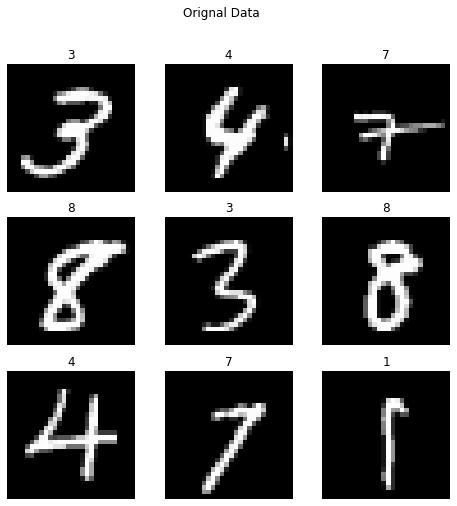

In [3]:
plot_orignal(train_mnist)

In [4]:
model = model.Net()
opt = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

load_check = True
epochs = 10 

if(load_check):
    load_checkpoint(model,opt,torch.load(r'C:\Users\Dhruv\OneDrive\Desktop\My_projects\Adversial_Attacks\mnist.pth.tar') )
else:    
    train_model(epochs,model,opt,train_mnist)


In [5]:
# evaluate_model(model,test_mnist)

In [6]:
accuracies = []
examples = []

epsilons = [0, .05, .1, .15, .2, .25, .3]
pretrained_model = "data/mnist.pth.tar"

# Run test for each epsilon
for eps in epsilons:
    acc, ex = test(model, 'cpu', test_mnist, eps)
    accuracies.append(acc)
    examples.append(ex)

Epsilon: 0	Test Accuracy = 9380 / 10000 = 0.938
Epsilon: 0.05	Test Accuracy = 8971 / 10000 = 0.8971
Epsilon: 0.1	Test Accuracy = 8086 / 10000 = 0.8086
Epsilon: 0.15	Test Accuracy = 6542 / 10000 = 0.6542
Epsilon: 0.2	Test Accuracy = 4792 / 10000 = 0.4792
Epsilon: 0.25	Test Accuracy = 3039 / 10000 = 0.3039
Epsilon: 0.3	Test Accuracy = 1698 / 10000 = 0.1698


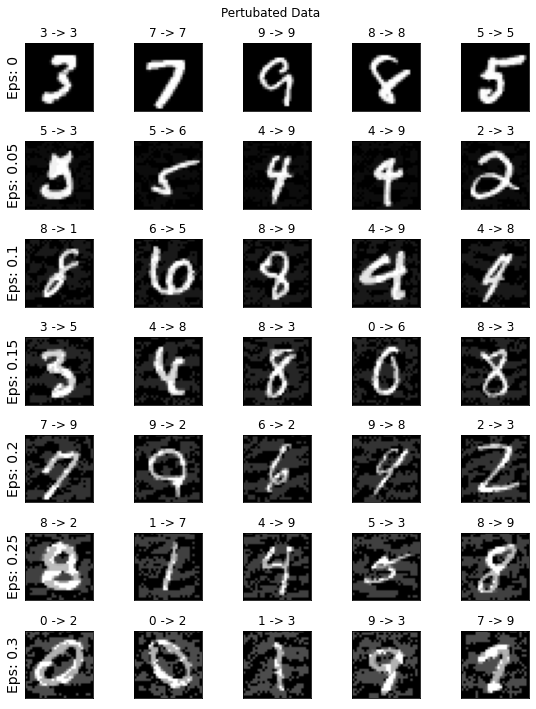

In [8]:
# Plot several examples of adversarial samples at each epsilon
plot_pertubations(epsilons,examples)